**OBLIGATORIO FINAL G448 - Data Wrangling**
<br>**INTEGRANTES:**
<br>
+ Theo Pereira, 5703834-3, theopereira2001@gmail.com
+ Carlos Píriz, 4298784-4, piriz.carlos@gmail.com
+ Gabriel	Better,3138871-2, gabrielbetter@gmail.com

In [ ]:
### Importacion de librerias ###

# Sistema
import os

# Tratamiento de datos
import pandas as pd
import numpy as np
import datetime as dt
import math

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import re

# Visualizacion 
import seaborn as sns
import matplotlib as mpl
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from babel.numbers import format_currency
import matplotlib.pyplot as plt
%matplotlib inline

**CONSIGNAS**
<br>
El objetivo general es realizar un análisis exploratorio de los anuncios inmobiliarios de
algunas provincias de la Patagonia Argentina reportados por el portal Airbnb.
<br>
Los datos están conformados por cuatro archivos csv:
+ Neuquen.csv
+ Rio_Negro.csv
+ Chubut.csv
+ Tierra_del_Fuego.csv

**<h1>1. Carga de datos y armado del dataset</h1>**

In [ ]:
# Carga de archivos de datos de chubut
df_chubut = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Chubut.csv')
df_chubut["provincia"]="CHUBUT"
df_chubut.sample(10)

In [ ]:
# Carga de archivos de datos de Neuquen
df_neuquen = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Neuquen.csv')

df_neuquen["provincia"] = "NEUQUEN"

df_neuquen.sample(10)

In [ ]:
# Carga de archivos de datos de Rio Negro
df_rio_negro = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Rio_Negro.csv')

df_rio_negro["provincia"] = "RIO NEGRO"

df_rio_negro.sample(10)

In [ ]:
# Carga de archivos de datos de Tierra delFuego
df_tierra_del_fuego = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Tierra_del_Fuego.csv')

df_tierra_del_fuego["provincia"] = "TIERRA DEL FUEGO"

df_tierra_del_fuego.sample(10)

In [ ]:
# Verificacion de columnas para concatenar
(df_chubut.columns == df_neuquen.columns) & (df_rio_negro.columns == df_tierra_del_fuego.columns) & (df_chubut.columns == df_tierra_del_fuego.columns)

In [ ]:
# Concatenacion de los dataframes separados por provincias en un unico archivo
df_alquileres = pd.concat([df_chubut, df_neuquen, df_rio_negro, df_tierra_del_fuego])
df_alquileres.sample(10)

In [ ]:
# Reseteo del index, permitiendo duplicados porque aun no sabemos si son unicos los valores
# df_alquileres.reset_index(names = 'id_alojamiento', drop=True,inplace=True,allow_duplicates= True)
# df_alquileres.reset_index(names = 'id_alojamiento', drop=True,inplace=True,allow_duplicates= False)
df_alquileres.reset_index(drop=True,inplace=True)

*Verificacion de filas de los dataframes*

In [ ]:
# Verificacion de la cantidad de filas de cada dataframe
print("La cantidad de filas del dataframe de Chubut es:"+str(df_chubut.shape[0]))
print("La cantidad de filas del dataframe de Neuquen es:"+str(df_neuquen.shape[0]))
print("La cantidad de filas del dataframe de Rio Negro es:"+str(df_rio_negro.shape[0]))
print("La cantidad de filas del dataframe de Tierra del fuego es:" + str(df_tierra_del_fuego.shape[0]))
print("La cantidad de filas del dataframe unificado de alquileres es:" + str(df_alquileres.shape[0]))


*Verificacion de las columnas de los dataframes*

In [ ]:
# Verificacion de la cantidad de columnas de cada dataframe
print("La cantidad de columnas del dataframe de Chubut es:" +
      str(df_chubut.shape[1]))
print("La cantidad de columnas del dataframe de Neuquen es:" +
      str(df_neuquen.shape[1]))
print("La cantidad de columnas del dataframe de Rio Negro es:" +
      str(df_rio_negro.shape[1]))
print("La cantidad de columnas del dataframe de Tierra del fuego es:" +
      str(df_tierra_del_fuego.shape[1]))
print("La cantidad de columnas del dataframe unificado de alquileres es:" +
      str(df_alquileres.shape[1]))

*Verificacion general e inicial del dataframe unificado*

In [ ]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.info()

In [ ]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.describe()

In [ ]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.duplicated(keep="first").sum()

In [ ]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.isna().sum()

*Conclusiones iniciales*
<br>
+ El dataframe unificado, coincide en cantidad de filas y columnas correspondientes a los dataframes individuales
+ Debemos de corregir algunos tipos de datos de columnas
+ Tenemos algunas columnas para reescalar
+ Tenemos filas duplicadas para revisar
+ Tenemos valores nulos para revisar, en principio para las columnas rating y price_discounted

**<h1>2. Análisis de duplicados</h1>**

*Analisis y tratamiento de duplicados global*

In [ ]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres.duplicated(keep="first").sum()

In [ ]:
#  Listo los valores duplicados
df_alquileres[df_alquileres.duplicated(keep="first")]

In [ ]:
# Elimino los duplicados, que coinciden en toda la fila
df_alquileres.drop_duplicates(keep="first", inplace=True)
df_alquileres.shape

*Analisis y tratamiento de duplicados por columna*

+ Columna 1: id_alojamiento

In [ ]:
# Busco si hay duplicados
df_alquileres['id_alojamiento'].duplicated(keep='first').sum()

In [ ]:
# Identifico filas con esos valores duplicados
df_alquileres[df_alquileres['id_alojamiento'].duplicated(keep='first')]

In [ ]:
# Muestro las filas que corresponden a los valores duplicados, todas
df_alquileres[df_alquileres['id_alojamiento'] == 53729814]

-> Analisis de los valores de las filas duplicadas.

In [ ]:
#Verificamos los valores 
df_alquileres.loc[647]

In [ ]:
# Verificamos los valores
df_alquileres.loc[648]

In [ ]:
# Verificamos los valores para la variable que tendria fiferencia
df_alquileres.loc[647]["characteristics"]

In [ ]:
# Verificamos los valores para la variable que tendria fiferencia
df_alquileres.loc[648]["characteristics"]

*ACCION:*
<BR>
*Vemos que seria el mismo registro con excepcion de la serie characteristics, donde tiene agregada comentario de calificacion*
<br>
*Como consideramos que cada valor de id_alojamiento, deberia ser unico, eliminamos el que consideramos repetido y menos se adecua a los valores esperados por serie*

In [ ]:
# Descartamos el registro que no tiene agregado el comentario de la calificacion
df_alquileres.drop([648], inplace=True)
df_alquileres[df_alquileres['id_alojamiento'] == 53729814]

+ Columna 2: name

In [ ]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres['name'].duplicated(keep="first").sum()

In [ ]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres[df_alquileres['name'].duplicated(keep="first")]

In [ ]:
df_alquileres[df_alquileres['name'].str.contains('Vista al Lago en el Bosque - Hab Compartida')]

*ACCION:*
<br>
*En este caso vemos que los nombre coinciden pero, pueden corresponder a diferentes lugares, de hecho, estan sobre diferentes calles, segun sus coordenadas.*
<br>
*Por tal motivo los dejamos a ambos registros*

+ Columna 3: category

In [ ]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres['category'].duplicated(keep="first").sum()

In [ ]:
# Listo los duplicados segun category
df_alquileres[df_alquileres['category'].duplicated(keep="first")].sample(10)

*ACCION:*
<br>
*Entendemos que los valores de categoria se pueden repetir para los diferentes alquileres*
<br>
*por lo cual, no realizamos ninguna accion en base a esta columna*

+ Columna 4: rating

In [ ]:
# Verifico los duplicado
df_alquileres['rating'].duplicated(keep="first").sum()

In [ ]:
# Listamos algunas filas, repetidas por rating
df_alquileres[df_alquileres['rating'].duplicated(keep="first")].sample(10)

In [ ]:
df_alquileres['rating'].unique()

*ACCION:*
<br>
*Entendemos que los valores de rating se pueden repetir para los diferentes alquileres*
<br>
*Por lo cual, dejamos los registros retpetidos segun esta columna*

+ Columna 5: city

In [ ]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres['city'].duplicated(keep="first").sum()

In [ ]:
# Listamos repetidos, por city
df_alquileres[df_alquileres['city'].duplicated(keep="first")]

*ACCION:*
<br>
*Entendemos que la columna city, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 6: latitude

In [ ]:
# Verificamos los duplicados
df_alquileres['latitude'].duplicated(keep="first").sum()

In [ ]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['latitude'].duplicated(keep="first")].sample(10)

In [ ]:
# Vemos un ejemplo
df_alquileres[df_alquileres['latitude'] == -54.803600]

*ACCION:*
<br>
*Entendemos que la columna latitude, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 7: longitude

In [ ]:
# Verificamos los duplicados
df_alquileres['longitude'].duplicated(keep="first").sum()

In [ ]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['longitude'].duplicated(keep="first")].sample(10)

In [ ]:
# Vemos un ejemplo
df_alquileres[df_alquileres['longitude'] == -65.029470]

*ACCION:*
<br>
*Entendemos que la columna longitude, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columan 8: characteristics

In [ ]:
# Verificamos los duplicados
df_alquileres['characteristics'].duplicated(keep="first").sum()

In [ ]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['characteristics'].duplicated(
    keep="first")].sample(10)

*ACCION:*
<br>
*Entendemos que la columna characteristics, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 9: check_in

In [ ]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['check_in'].duplicated(keep="first").sum()

*ACCION:*
<br>
*Entendemos que la columna check_in, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 10: check_out

In [ ]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['check_out'].duplicated(keep="first").sum()

*ACCION:*
<br>
*Entendemos que la columna check_out, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 11: price_discounted

In [ ]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_discounted'].duplicated(keep="first").sum()

*ACCION:*
<br>
*Entendemos que la columna price_discounted, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 12: price_original

In [ ]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_original'].duplicated(keep="first").sum()

*ACCION:*
<br>
*Entendemos que la columna price_original, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 13: price_qualifier

In [ ]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_qualifier'].duplicated(keep="first").sum()

*ACCION:*
<br>
*Entendemos que la columna price_qualifier, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 14: cant_resultados

In [ ]:
# Verificamos los duplicados
df_alquileres['cant_resultados'].duplicated(keep="first").sum()

*ACCION:*
<br>
*Entendemos que la columna cant_resultados, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

Columna 15: fecha_scrapping

In [ ]:
# Verificamos los duplicados
df_alquileres['fecha_scrapping'].duplicated(keep="first").sum()

*ACCION:*
<br>
*Entendemos que la columna fecha_scrapping, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 16: fecha_cambio_bna

In [ ]:
# Verificamos los duplicados
df_alquileres['fecha_cambio_bna'].duplicated(keep="first").sum()

*ACCION:*
<br>
*Entendemos que la columna fecha_cambio_bna, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 17: cambio_bna

In [ ]:
# Verificamos los duplicados
df_alquileres['cambio_bna'].duplicated(keep="first").sum()

*ACCION:*
<br>
*Entendemos que la columna cambio_bna, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 18: provincia

In [ ]:
# Verificamos los duplicados
df_alquileres['provincia'].duplicated(keep="first").sum()

*ACCION:*
<br>
*Entendemos que la columna provincia, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

*OBSERVACION GENERAL*
<br>
*En general entendemos que la mayoria de las columnas podrian tener valores repetidos evaluandolas individualmente.*
<br>
*Pero si consideramos que la variable id_alojamiento identifica de manera biunivoca un alojamiento.*
<br>
*Podemos decir que no es lo mismo, un duplicado en la columna id_alojamiento(que no deberia tener valores repetidos), que un duplicado en la columna price_original,*
<br>
*(que podria perfectamente tener valores repetidos en la seria).*


**<h1>3. Análisis de datos faltantes y limpieza</h1>**

+ Mostrar el porcentaje de datos faltantes de cada columna

In [ ]:
# Verificacion inicial del dataset
df_alquileres.info()

*En primera instancia observamos que solo nos quedan dos columnas con datos faltantes: rating y price_discounted*
<br>
*Para rating, tenenmos un 81.90 % de faltantes (842 de 1028).*
<br>
*Para rating, tenenmos un 18.58 % de faltantes (191 de 1028).*


+ ¿Cuáles son las 3 columnas con más datos faltantes?

*En nuestra observacion inicial, en principio tenemos dos columnas con datos faltantes solamente: rating y price_discounted*

**LIMPIEZA DE DE DATOS POR COLUMNAS**

In [ ]:
df_alquileres.info()

+ Columna 0: id_alojamiento

In [ ]:
df_alquileres['id_alojamiento'].nunique()

In [ ]:
df_alquileres['id_alojamiento'].isna().sum()

+ Columna 1: name

In [ ]:
sorted(df_alquileres['name'].unique())

+ Columna 2: category

In [ ]:
# Vemos que tiene valores bien definidos, que no necesitan normalizar
df_alquileres['category'].unique()

In [ ]:
# Verificamos que no tienen  na
df_alquileres['category'].isna().sum()

In [ ]:
# Cambiamos el tipo de la serie
df_alquileres['category'] = df_alquileres['category'].astype('category')

+ Columna 3: rating

In [ ]:
# Vemos que tiene valores bien definidos, que no necesitan normalizar
df_alquileres['rating'].unique()

In [ ]:
# Observamos que existen valores na y uno que seria "Nuevo"
# Reemplazamos el valor Nuevo por na
mask = df_alquileres['rating'].str.lower().str.contains('nuevo', na = False)
df_alquileres.loc[mask, 'rating'] = np.NaN

In [ ]:
# Tratamiento de la columna rating
# Separamos los valores correspondientes para limpiarlos
df_rating= df_alquileres['rating'].str.split(pat="[ ]",expand=True).add_prefix('Columna')
# Renombramos las columnas
df_rating.rename(columns={"Columna0": "rating", "Columna1": "votaciones"}, inplace=True)

In [ ]:
# Limpiamos los valores para la columna rating
df_rating['rating'] = df_rating['rating'].replace(',','.')

In [ ]:
# Reemplazamos la columna por punto para la columna rating y lo cambiamos de tipo
df_rating['rating'] = df_rating['rating'].str.replace(',', '.')
df_rating['rating'] = df_rating['rating'].astype('float64')

In [ ]:
df_rating.info()

In [ ]:
# Limpiamos la columna de votaciones para cambiarle el tipo
df_rating['votaciones'] = df_rating['votaciones'].str.replace('(', '').str.replace(')', '')
df_rating['votaciones'] = np.floor(pd.to_numeric(df_rating['votaciones'], errors='coerce')).astype('Int64')


In [ ]:
#  Rellenamos los valores para las columnas rating y votaciones
# Rellenamos con un valor promedio, pero establecemos que no tiene votaciones
media_rating = df_rating['rating'].mean()
media_votaciones = np.floor(df_rating['votaciones'].mean())
df_rating.fillna({'rating':media_rating,'votaciones':media_votaciones},inplace= True)


In [ ]:
# Enriquecemos el dataframe de alquileres con las columnas de rating y votaciones
df_alquileres= df_alquileres.merge(df_rating,how='left',left_index=True,right_index=True,suffixes=('', '_y'))
df_alquileres[['rating_y','votaciones']].head()


In [ ]:
# Actualizamos las columnas del dataframe rating y votaciones
df_alquileres['rating']= df_alquileres['rating_y']
df_alquileres = df_alquileres.drop('rating_y',axis=1)
df_alquileres.info()


+ Agregamos la columna: best_reviews

In [ ]:
df_alquileres['best_reviews'] = np.where(df_alquileres['rating']==5.0,True,False)
df_alquileres.sample(10)

In [ ]:
# Porcentaje de moejores reviews
mejores = df_alquileres[df_alquileres["best_reviews"]]['best_reviews'].count()
no_mejores = df_alquileres[~df_alquileres["best_reviews"]]['best_reviews'].count()
porc = mejores /(mejores+no_mejores)*100
print(f"La cantidad de mejores reseñas es de :{mejores} y corresponde a un {porc} %.")

+ Columna 4: city

In [ ]:
# Vemos que tiene valores bien definidos, que no necesitan normalizar
df_alquileres['city'].unique()

In [ ]:
# Como vemos que varias ciudades son la misma pero con alguna diferencia tipografica, tratamos de normalizar los valores
df_alquileres['city'] = df_alquileres['city'].str.strip().str.upper()
df_alquileres.head()

In [ ]:
# Quitamos los tildes
df_alquileres['city'] = df_alquileres['city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_alquileres.head()

In [ ]:
# Recopilamos los datos de ciudades que tienen lugeres turisicos, segun la provincia, para tratar de agruparlas
aux_ciudades = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Provincias_Ciudades.csv',sep= ';',encoding='latin1')
aux_ciudades['ciudad'] = aux_ciudades['ciudad'].str.upper().str.strip()
aux_ciudades['ciudad'] = aux_ciudades['ciudad'].str.normalize(
    'NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
aux_ciudades.head()

In [ ]:
# Creamos una columna city2, que va a a guardar los valores resultantes para city
df_alquileres['city2'] = df_alquileres['city']


# Parametros para los cuales buscar la mejor aproximacion por fuzzy
provincias = ['TIERRA DEL FUEGO', 'NEUQUEN', 'RIO NEGRO', 'CHUBUT']
# Valres de match que aceptamos
aprobaciones = [80, 80, 80, 80]

# rr=0;
# iter=0
# Iteramos por indice, para provincias y aprobaciones
for indice in range((len(provincias))):
    # Iteramos  por cada ciudad segun la provincia
    for _, row in df_alquileres.loc[df_alquileres['provincia']==provincias[indice]].iterrows():
        ciudad_probar = str(row['city'])
        #aloj=-1
        #iter+=1
        max_coincidencia=0
        encontro = False
        # Recorremos la lista de ciudades de la provincia recabados para verificar
        for valor_correcto in aux_ciudades.loc[aux_ciudades['provincia'] == provincias[indice]]['ciudad']:            
            # Obtenemos el ratio de coincidencia
            coincidencia = fuzz.ratio(ciudad_probar, valor_correcto)
            #print(f"Iteraccion: {iter},id_Alojamiento:{row['id_alojamiento']} index: {_} ==== Comparo {ciudad_probar} de {str(row['provincia'])} , con {valor_correcto} de {provincias[indice]}. Resultdo {coincidencia}")
            # Si el puntaje de la coincidencia es mayor que la vigente
            if coincidencia > max_coincidencia:
                # Guardar el valor correcto
                correccion = valor_correcto
                # Reemplazar el puntaje
                max_coincidencia = coincidencia                
                if (coincidencia > max_coincidencia) & (max_coincidencia >= aprobaciones[indice]):
                    # Guardar el valor correcto
                    correccion = valor_correcto
                    # Reemplazar el puntaje
                    max_coincidencia = coincidencia
                    # Reemplazo por el mejor valor aproximado, en la columna auxiliar
                    df_alquileres['city2']=correccion
                    # Aviso que encontre algo
                    encontro = True
        # Si no encontre una coincidencia suficiente, cambio de macheo
        if( not encontro):
            # Recorremos la lista de departamentos
            max_coincidencia_parcial = 0            
            for valor_correcto_parcial in aux_ciudades.loc[aux_ciudades['provincia'] == provincias[indice]]['ciudad']:
                # Obtenemos el ratio de coincidencia
                coincidencia_parcial = fuzz.partial_ratio(ciudad_probar, valor_correcto_parcial)
                # print(f"Iteraccion: {iter},id_Alojamiento:{row['id_alojamiento']} index: {_} ==== Comparo {ciudad_probar} de {str(row['provincia'])} , con {valor_correcto_parcial} de {provincias[indice]}. Resultdo {coincidencia_parcial}")
                # Si el puntaje de la coincidencia es mayor que la vigente
                if coincidencia_parcial > max_coincidencia_parcial:
                    # Guardar el valor correcto
                    correccion_parcial = valor_correcto_parcial
                    # Reemplazar el puntaje
                    max_coincidencia_parcial = coincidencia_parcial
                    if (coincidencia_parcial > max_coincidencia_parcial) & (max_coincidencia_parcial >= aprobaciones[indice]):
                        # Guardar el valor correcto
                        correccion_parcial = valor_correcto_parcial
                        # Reemplazar el puntaje
                        max_coincidencia_parial = coincidencia_parcial                        
                        # Asigno el mejor valor posible encontrado
                        df_alquileres['city2']=correccion_parcial
                        encontro = True
                        
                        
# En caso de que no se cumpla con las condiciones del macheo, mantiene el valor para ciudad inicial
            

In [ ]:
# Tenemos cuatro alojamientos que no tienen ciudad ingresada
df_alquileres['city'].isna().sum()

In [ ]:
# Consideramos que la ciudad es un dato importante, y por la cantidad la accion a tomar es elimnar esos 4 registros. Pero como en este analisis no require el uso de la columna city. lo dejamos
# df_alquileres.dropna(subset=['city'],inplace= True)

In [ ]:
# Asignamos los nuevos valores a city y eliminamos la columna city2
df_alquileres['city']=df_alquileres['city2']
df_alquileres = df_alquileres.drop('city2', axis=1)

In [ ]:
df_alquileres.groupby(by='city',observed=True)['city'].count()

In [ ]:
# Cambiamos el tipo de datos de city
df_alquileres['city'] = df_alquileres['city'].astype('category')

+ Columna 5: latitude

In [ ]:
df_alquileres['latitude'].info()

In [ ]:
df_alquileres['latitude'].unique()

In [ ]:
# No tenemos valores nulos
df_alquileres['latitude'].isna().unique()

+ Columna 6: longitude

In [ ]:
df_alquileres['longitude'].info()

In [ ]:
# No tenemos valores nulos
# df_alquileres['longitude'].isna().unique()
df_alquileres['longitude'].unique()

In [ ]:
df_alquileres.info()

+ Columna 7: characteristics

In [ ]:
# Chequeo rapido de los valores de characteristics
df_alquileres['characteristics'].unique()

In [ ]:
# Creamos un dataframe auxiliar para trabajar con las caracteristicas
df_caracteristicas = df_alquileres[['id_alojamiento','characteristics']]
df_caracteristicas.sample(10)

In [ ]:
# Generamos un dataframe auxiliar para poder determinar las diferentes caracteristicas posibles
df_temp = df_caracteristicas['characteristics'].str.split(
    pat=',', expand=True).add_prefix('Columna')
# Juntamos los dos dataframes auxiliares
df_caracteristicas = df_caracteristicas.merge(
    df_temp, how='left', left_index=True, right_index=True, suffixes=('', '_y'))

In [ ]:
# Agragamos columnas correspondientes para asignar los valores de caracteristicas a utilizar posteriormente, seteandolas a na
df_caracteristicas['cama']=None
df_caracteristicas['dormitorio']=None
df_caracteristicas['baño']=None

# df_caracteristicas['cama']=df_caracteristicas['cama'].astype('Int64')
# df_caracteristicas['dormitorio']=df_caracteristicas['dormitorio'].astype('Int64')
# df_caracteristicas['baño']=df_caracteristicas['baño'].astype('Int64')

In [ ]:
# Como vimos que existen "Monoambiente", para esos alojamientos, ponemos dormitorio en 0
df_caracteristicas['dormitorio']= np.where(df_caracteristicas['characteristics'].str.lower().str.contains('monoambiente'),0,None)

In [ ]:
# EN ESTA SECCION TRATAMOS DE DETERMINAR LA CANTIDAD DE CAMAS, DORMITORIOS Y BAÑOS POR ALOJAMIENTO

# Columnas a rellenar y texto a buscar
busqueda = ['cama', 'dormitorio', 'baño']
# Recorremos por la lista de busqueda
for bus in busqueda:
    # Iteramos en el dataframe de caracteristicas
    for indice, fila in df_caracteristicas.iterrows():
        # Variable para concatenar  y formar los nombres de columnas
        ii = 2
        # Loop para encontrar el posible valor para las camas, dormitorios y baños si no los tienen, dentro de las columnas que se generaron al hacer split
        while (pd.isnull(df_caracteristicas.loc[indice,bus]) and (ii <= 14)):
            # Nombre de columna con la cual trabajar
            cc = 'Columna'+str(ii-2)
            # Id de alojamiento de la fila
            idd = fila['id_alojamiento']
            # Valor de la columna, sobre el cual realizar la busqueda
            val = fila[cc]
            # si todavia no se ha encontrado un valor acorde
            if(not pd.isnull(val)):
                # Si existe un patron que corresponda al buscado: Nro y cama o dormitorio o baño
                if bool(re.search(r'\d '+bus,val)):
                    # Obtenemos el valor que corresponde a la cantidad
                    dato = re.search(r'\d',val)                    
                    # print(fila['id_alojamiento'], val,dato.group(0))
                    # Asignamos el valor hallado en el dataframe de caracteristicas
                    df_caracteristicas.loc[indice,bus]=dato.group(0)
            # incrementamos la variabla para que salga, cuando terminen las columnas a buscar, aunque no lo encuentre
            ii+=1
            

In [ ]:
df_caracteristicas.sample(20)


In [ ]:
# Revision de na faltantes para la columna baño
df_caracteristicas['baño'].info()


In [ ]:
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas[(mask_baño & mask_dormitorio & mask_cama)]
df_alquileres.loc[(df_alquileres['id_alojamiento'] == 13998536) | (df_alquileres['id_alojamiento'] == 20234351)]

# Para estos casos en particular, consideramos que puedes ser una especie de lugar solamente, 
# donde NO tengan baños privados, que no tengan camas porque tengan que llevar bolsa para dormir, etc 
# Y ademas no se considera que tengan dormitorio

df_caracteristicas['dormitorio']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['dormitorio'])
df_caracteristicas['cama']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['cama'])
df_caracteristicas['baño']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['baño'])


In [ ]:
# Observamos que no hay mas filas donde baño sea na que tenga datos faltantes en cama o dormitorio
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()

df_caracteristicas.loc[((mask_baño & mask_dormitorio) | (mask_baño & mask_cama)),['id_alojamiento','cama','baño','dormitorio']]

In [ ]:
# Asignacion de al menos un baño
df_caracteristicas.fillna({'baño':1},inplace= True)
mask_baño = df_caracteristicas['baño'].isna()
df_caracteristicas.loc[(mask_baño ),['id_alojamiento','cama','baño','dormitorio']]

* Revision para la columna cama

In [ ]:
# Revision de na faltantes para la columna baño
df_caracteristicas['cama'].info()


In [ ]:
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_cama)]

In [ ]:
# Asumimos que estos registros, tienen al menos una cama (aunque sea sofacama)
df_caracteristicas.fillna({'cama':1},inplace= True)
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_cama)]

* Revision de la columna dormitorio

In [ ]:
df_caracteristicas['dormitorio'].info()

In [ ]:
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
df_caracteristicas.loc[(mask_dormitorio)]

In [ ]:
# Observamos que todos tienen alguna cama en las caracteristicas y asumimos, al menos 1 dormitorio en el alojamiento
df_caracteristicas.fillna({'dormitorio':1},inplace= True)
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
df_caracteristicas.loc[(mask_dormitorio)]

In [ ]:
# Verificacion general, para asegurarnos que se asignaron todos los valores
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_baño | mask_dormitorio | mask_cama),['id_alojamiento','cama','baño','dormitorio']]

In [ ]:
df_aux= df_caracteristicas[['id_alojamiento','cama','dormitorio','baño']]
df_alquileres = df_alquileres.merge(
    df_aux,
    left_index=False,
    right_index=False,
    left_on='id_alojamiento',
    right_on='id_alojamiento',
    how='left',
    suffixes=('', '_y')        
)
df_alquileres.head()

In [ ]:
df_alquileres.info()

+ Columna 8: check_in

In [ ]:
# Chequeo rapido de los valores de characteristics
df_alquileres['check_in'].info()

In [ ]:
df_alquileres['check_in']= pd.to_datetime(df_alquileres['check_in'],format='mixed')
df_alquileres['check_in'].sample(10)

+ Columna 9: check_out

In [ ]:
# Chequeo rapido de los valores de characteristics
df_alquileres['check_out'].info()

In [ ]:
df_alquileres['check_out']= pd.to_datetime(df_alquileres['check_out'],format='mixed')
df_alquileres['check_out'].sample(10)

In [ ]:
df_alquileres.info()

+ Columna 10: price_original

In [ ]:
# Chequeo rapido de los valores de la colkumna
df_alquileres['price_original'].info()

In [ ]:
df_alquileres['price_original'].sample(15)

In [ ]:
# Obtengo solo los valores para el precio original
col = df_alquileres['price_original'].str.extract(pat=r'(\d+)')
df_alquileres['price_original']=col

In [ ]:
df_alquileres['price_original']=df_alquileres['price_original'].astype('Int64')

In [ ]:
df_alquileres['price_original'].unique()

+ Columna 11: price_discounted

In [ ]:
# Chequeo rapido de los valores de characteristics
df_alquileres['price_discounted'].info()

In [ ]:
df_alquileres['price_discounted'].sample(20)

In [ ]:
# Creo la columna, que indica si el precio ya tiene descuento
df_alquileres['discounted']=np.where(df_alquileres['price_discounted'].isna(),False,True)

In [ ]:
df_alquileres[['price_discounted','discounted']].sample(20)

In [ ]:
# df_alquileres['price_discounted1']=df_alquileres['price_discounted'].str.extract(pat='(\d+)')
col = df_alquileres['price_discounted'].str.extract(pat=r'(\d+)')
df_alquileres['price_discounted1']=col


In [ ]:
df_alquileres[['price_original','price_discounted','discounted','price_discounted1']].sample(20)

In [ ]:
df_alquileres['price_discounted1']=np.where( df_alquileres['price_discounted1'].isna(),df_alquileres['price_original'],df_alquileres['price_discounted1'])

In [ ]:
df_alquileres['price_discounted'] = df_alquileres['price_discounted1']

In [ ]:
df_alquileres[['price_original','price_discounted','discounted','price_discounted1']].sample(20)

In [ ]:
df_alquileres = df_alquileres.drop('price_discounted1', axis=1)

In [ ]:
df_alquileres[['price_original','price_discounted','discounted']].info()

In [ ]:
df_alquileres['price_discounted'].unique()

In [ ]:
df_alquileres['price_discounted']=(pd.to_numeric(df_alquileres['price_discounted'], errors='coerce')).astype('Int64')

In [ ]:
df_alquileres[['price_original','price_discounted','discounted']].sample(20)

+ Columna 12: price_qualifier

In [ ]:
df_alquileres['price_qualifier'].info()

In [ ]:
df_alquileres['price_qualifier'].unique()

In [ ]:
df_alquileres['price_qualifier']= df_alquileres['price_qualifier'].astype('category')

+ Columna 13: cant_resultados

In [ ]:
df_alquileres['cant_resultados'].info()

In [ ]:
df_alquileres['cant_resultados'].unique()

In [ ]:
df_alquileres['cant_resultados'].sample(20)

+ Columna 14: fecha_scrapping

In [ ]:
df_alquileres['fecha_scrapping'].info()

In [ ]:
df_alquileres['fecha_scrapping'].sample()

In [ ]:
df_alquileres['fecha_scrapping']=pd.to_datetime(df_alquileres['fecha_scrapping'],format='mixed')

+ Columna 15: fecha_cambio_bna

In [ ]:
df_alquileres['fecha_cambio_bna'].info()

In [ ]:
df_alquileres['fecha_cambio_bna'].sample()

In [ ]:
df_alquileres['fecha_cambio_bna'].unique()

In [ ]:
df_alquileres['fecha_cambio_bna']= pd.to_datetime(df_alquileres['fecha_cambio_bna'],format='mixed')

+ Columna 16: cambio_bna

In [ ]:
df_alquileres['cambio_bna'].info()

In [ ]:
df_alquileres['cambio_bna'].sample(20)

In [ ]:
df_alquileres['cambio_bna'].unique()

In [ ]:
df_alquileres['cambio_bna']=df_alquileres['cambio_bna'].astype('float')

+ Columna 17: provincia

In [ ]:
df_alquileres['provincia']=df_alquileres['provincia'].astype('category')

In [ ]:
# Ajustamos tipos de datos de las columnas cama, dormitorio, baño
df_alquileres['cama']=(pd.to_numeric(df_alquileres['cama'], errors='coerce')).astype('Int64')
df_alquileres['baño']=(pd.to_numeric(df_alquileres['baño'], errors='coerce')).astype('Int64')
df_alquileres['dormitorio']=(pd.to_numeric(df_alquileres['dormitorio'], errors='coerce')).astype('Int64')

In [ ]:
df_alquileres.info()

**<h1>4. Análisis general de precios</h1>**

* ¿Cuántos alquileres con descuento hay?

In [637]:
print(f"Tenemos {df_alquileres.discounted.sum()} alojamientos que tienen descuentos.")

Tenemos 191 alojamientos que tienen descuentos.


* ¿Cuál es el alquiler más caro?

In [642]:
df_alquileres[['id_alojamiento','price_discounted']].sort_values(by='price_discounted',ascending=False).head(1)

,id_alojamiento,price_discounted
540,644276838771395202,699


* ¿Cuál es el alquiler más barato?

In [645]:
# Tenemos 3 alojamientos con el precio mas bajo
df_alquileres[['id_alojamiento','price_discounted']].sort_values(by='price_discounted',ascending=True).head(3)

,id_alojamiento,price_discounted
370,13998536,9
404,22929455,9
395,13803835,9


* Mostrar 2 histogramas de los precios originales y los precios con descuento.

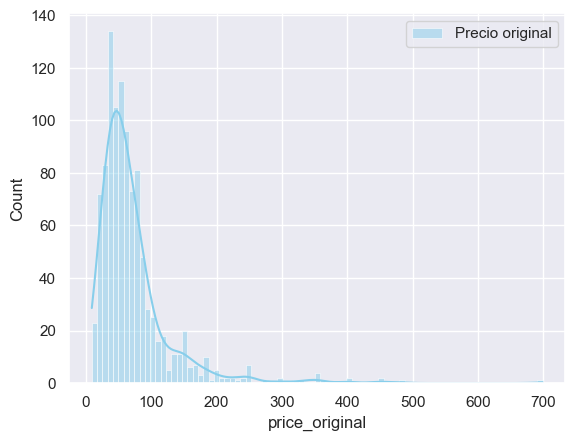

In [663]:
sns.set_theme(style="darkgrid")
sns.histplot(data=df_alquileres, x="price_original", color="skyblue", label="Precio original", kde=True)

plt.legend() 
plt.show()

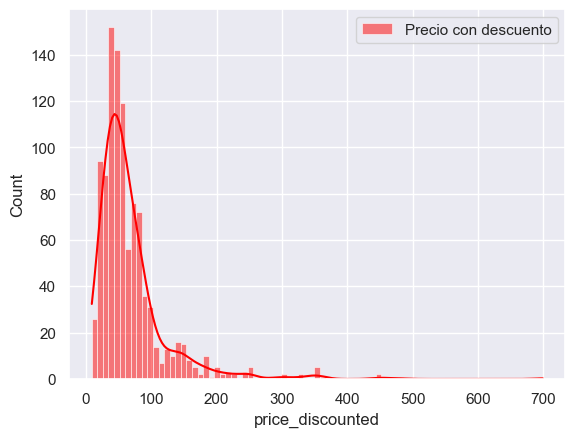

In [662]:
sns.set_theme(style="darkgrid")

sns.histplot(data=df_alquileres, x="price_discounted", color="red", label="Precio con descuento", kde=True)
plt.legend() 
plt.show()

* ¿Observa alguna diferencia?

Observamos que la proporcion de los precios es similar, lo que hay de diferente entre los precios originales y los que tienen descuento es que el maximo es diferente. Lo cual es logico.

**<h1>5. Discretización de precios</h1>**

In [664]:
df_alquileres['price_original'].describe()

count       1028.0
mean     71.090467
std      58.885053
min            9.0
25%           39.0
50%           56.0
75%           80.0
max          699.0
Name: price_original, dtype: Float64

En base a lo observado, tomamo como ancho un bin de 250

In [665]:
df_alquileres['price_category']=np.where(
    df_alquileres['price_original']<250,'bajo',np.where(
        ((df_alquileres['price_original']>=250) & (df_alquileres['price_original']<500)),'medio','alto'
    )
)

In [671]:
df_alquileres['price_category'].unique()

array(['bajo', 'medio', 'alto'], dtype=object)

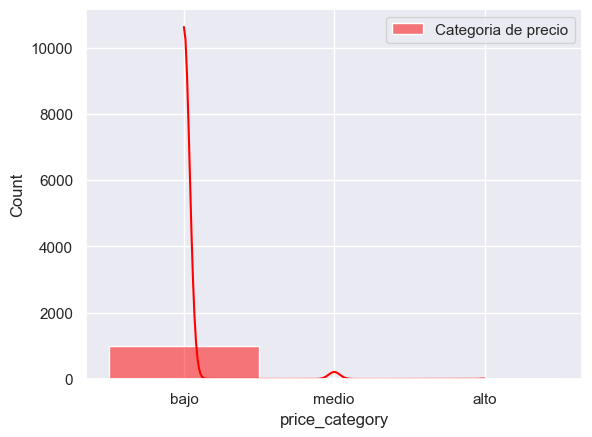

In [673]:
sns.set_theme(style="darkgrid")

sns.histplot(data=df_alquileres, x="price_category", color="red", label="Categoria de precio", kde=True)
plt.legend() 
plt.show()

<Axes: xlabel='price_category', ylabel='price_original'>

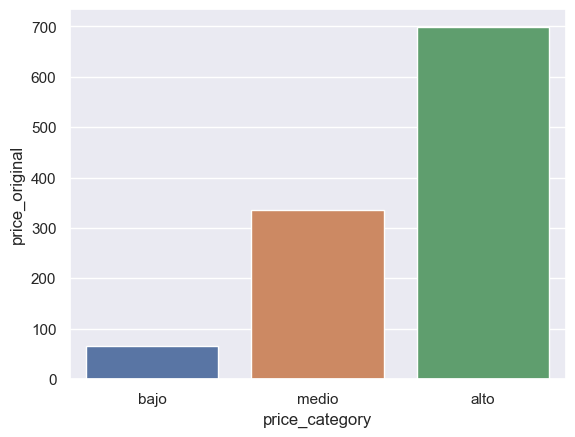

In [680]:
sns.barplot(x="price_category", y="price_original", hue="price_category", data=df_alquileres, errorbar=None)